# Pretrained model 1

# Installing the Roboflow Library
In this cell, we install the Roboflow Python SDK, which provides an interface to interact with Roboflow’s API. This SDK enables us to manage datasets, models, and projects directly in the notebook.

```python
!pip install roboflow



---

```markdown
# Initializing Roboflow and Accessing the Dataset
The following code initializes the Roboflow client, accesses the specific project, and downloads the dataset for use.

- **Roboflow API Key**: The `Roboflow` class is initialized with an API key to authenticate and access resources.
- **Accessing the Project and Dataset**: We specify the workspace and project name, then select the specific version of the dataset required for this analysis.
- **Downloading the Dataset**: Finally, the dataset is downloaded in YOLO format, which is compatible with YOLO-based object detection models.

```python
from roboflow import Roboflow
rf = Roboflow(api_key="your_api_key")
project = rf.workspace("tp2-xvt9v").project("traffic-violation-detection-nmp13")
version = project.version(4)
dataset = version.download("yolov11")


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wdZfPn9rjQQWNPZHNTGY")
project = rf.workspace("tp2-xvt9v").project("traffic-violation-detection-nmp13")
version = project.version(4)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Violation-Detection-4 in yolov11:: 100%|██████████| 11898/11898 [00:02<00:00, 4195.50it/s]


# Installing the Inference SDK
This command installs the `inference-sdk` library, which provides tools to interact with machine learning models hosted on platforms that support remote inference. The SDK allows us to easily send images to a model for predictions and retrieve the output.

```python
!pip install inference-sdk


In [ ]:
!pip install inference-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00


# Traffic Violation Detection Inference

This code snippet performs inference on images in a specified directory to detect traffic violations using a pre-trained model. Below is a breakdown of the main components:

## Imports

- **os**: A module that provides a way to use operating system-dependent functionality like reading or writing to the file system.
- **pandas**: A powerful data manipulation and analysis library, used here to handle the results and save them to a CSV file.

## Path Setup

- `test_dir`: A string variable that defines the path to the directory containing the test images. You should update this path based on your directory structure.
- `model_id`: A string that identifies the specific model to be used for inference.

## Results Storage

- `results`: An empty list that will be used to store the results of the inference for each image.

## Image Processing

- A loop iterates over each image in the specified directory (`test_dir`):
  - **Image Path Creation**: For each image, the full path is constructed using `os.path.join`.
  - **File Check**: The code checks if the path is a file to skip any subdirectories.
  
### Inference and Result Collection

- Inside the loop, a try-except block is used to handle any potential errors during inference:
  - **Inference Execution**: The code calls `CLIENT.infer`, passing the image path and model ID. This function is expected to return predictions related to traffic violations.
  - **Results Processing**: Each prediction returned is processed, and relevant details (like bounding box coordinates, confidence scores, and class IDs) are appended to the `results` list.

## Error Handling

- If an error occurs during the processing of an image, an error message is printed to the console with the image name.

## Saving Results

- After processing all images, the results are saved to a CSV file:
  - The `results` list is converted into a pandas DataFrame.
  - The DataFrame is then saved as a CSV file at the specified path (`output_csv_path`).

## Output Message

- Finally, a message is printed indicating where the results have been saved.

This code effectively automates the process of running inference on a set of images and storing the results for further analysis.



The same structure is been followed for other pretrained models imported as well


In [ ]:
import os
import pandas as pd
# Path to the directory containing test images
test_dir = "/content/Traffic-Violation-Detection-4/test/images"  # Update with the actual path

# Model ID
model_id = "traffic-violation-detection-nmp13/2"

# List to store results for each image
results = []

# Iterate over each image in the test directory
for image_name in os.listdir(test_dir):
    image_path = os.path.join(test_dir, image_name)

    # Check if it's a file (to skip any subdirectories)
    if os.path.isfile(image_path):
        try:
            # Run inference on the image
            result = CLIENT.infer(image_path, model_id=model_id)

            # Process each prediction in the result
            for prediction in result.get('predictions', []):
                # Append the details to the results list
                results.append({
                    'image_path': image_path,
                    'inference_id': result['inference_id'],
                    'time': result['time'],
                    'image_width': result['image']['width'],
                    'image_height': result['image']['height'],
                    'bbox_x': prediction['x'],
                    'bbox_y': prediction['y'],
                    'bbox_width': prediction['width'],
                    'bbox_height': prediction['height'],
                    'confidence': prediction['confidence'],
                    'class': prediction['class'],
                    'class_id': prediction['class_id'],
                    'detection_id': prediction['detection_id']
                })

        except Exception as e:
            print(f"Error processing {image_name}: {e}")

# Save results to a CSV file
output_csv_path = "/content/results.csv"
df = pd.DataFrame(results)
df.to_csv(output_csv_path, index=False)

print(f"Results saved to {output_csv_path}")


Results saved to /content/results.csv


In [ ]:
df.head()

image_path  \
0  /content/Traffic-Violation-Detection-4/test/im...   
1  /content/Traffic-Violation-Detection-4/test/im...   
2  /content/Traffic-Violation-Detection-4/test/im...   
3  /content/Traffic-Violation-Detection-4/test/im...   
4  /content/Traffic-Violation-Detection-4/test/im...   

                           inference_id      time  image_width  image_height  \
0  a3141a03-e8ef-42c4-921c-0398da523891  0.056702          640           360   
1  b3c6f1ee-cd53-4d08-912f-8bc7dc4bca4a  0.039262          640           360   
2  0e6a94cb-a403-4620-af9e-9b0c6a579f97  0.036993          640           360   
3  f822e628-fadc-434b-9d4f-e5f12bc5c8ce  0.038347          640           360   
4  f822e628-fadc-434b-9d4f-e5f12bc5c8ce  0.038347          640           360   

   bbox_x  bbox_y  bbox_width  bbox_height  confidence           class  \
0   286.0   211.0        22.0         34.0    0.625170  0 - motorcycle   
1   410.5   160.0         7.0         18.0    0.691997  0 - motorcycle   
2   372.5   242.0        13.0         22.0    0.618034  0 - motorcycle   
3   230.5   257.0        21.0         38.0    0.723802  0 - motorcycle   
4   468.5    76.0        13.0         22.0    0.449576  0 - motorcycle   

   class_id                          detection_id  
0         0  1761c18f-e78f-4bee-be00-533cec40b00f  
1         0  87cfd9b9-d54d-4068-b5e7-19a1a0941a79  
2         0  f9aafdf8-08d1-42cf-9b9e-a8f4a2c65e18  
3         0  a4863fda-5be7-4a15-9b15-9f859f3dd88d  
4         0  feb3c391-2cfe-4514-988e-6326e8c51f87

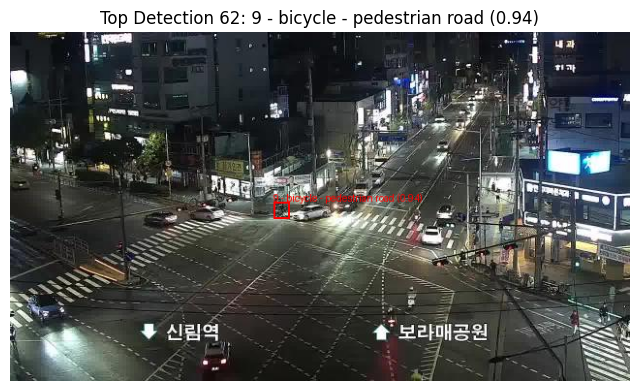

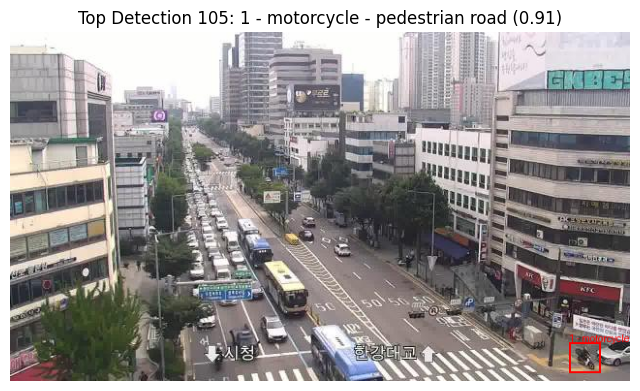

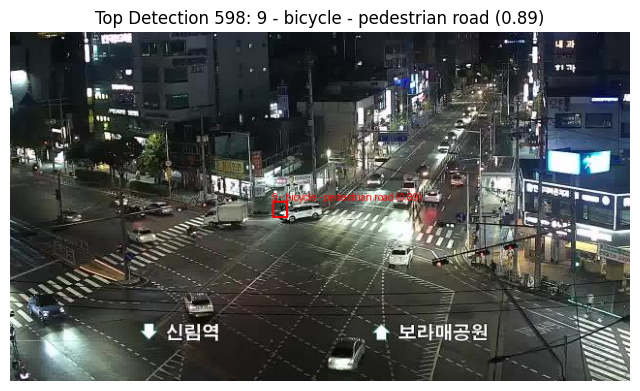

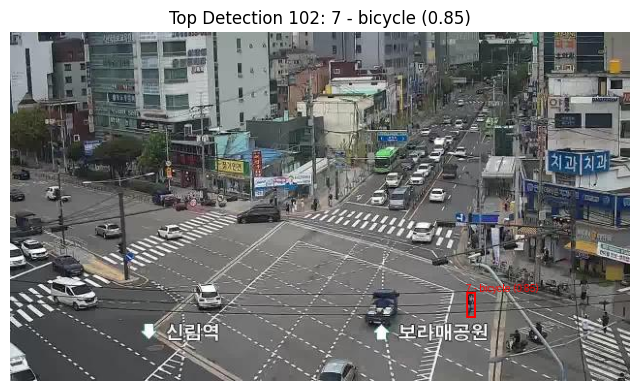

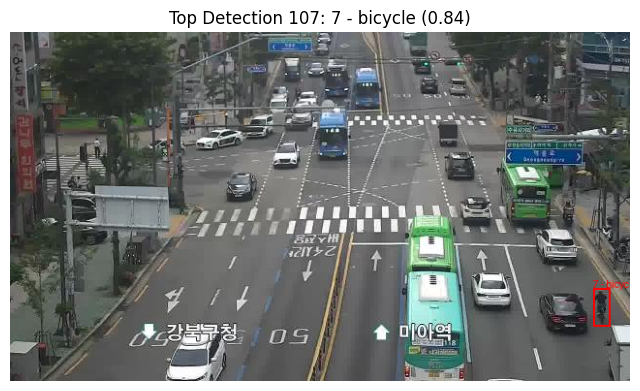

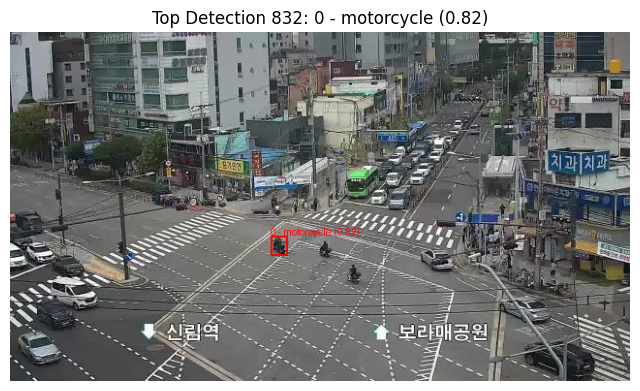

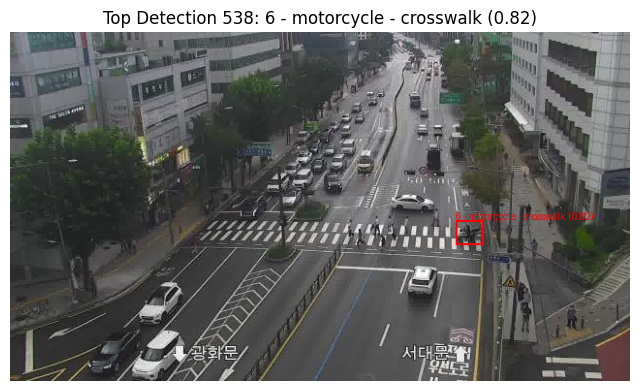

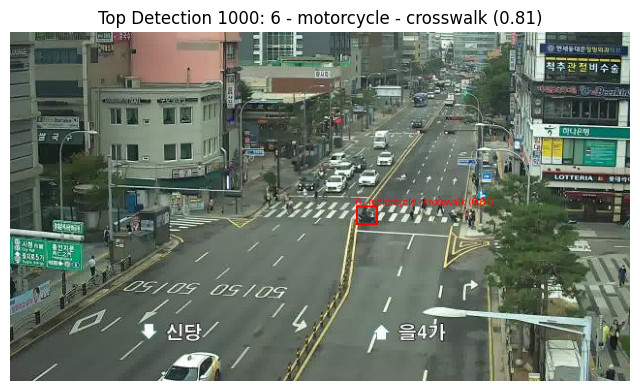

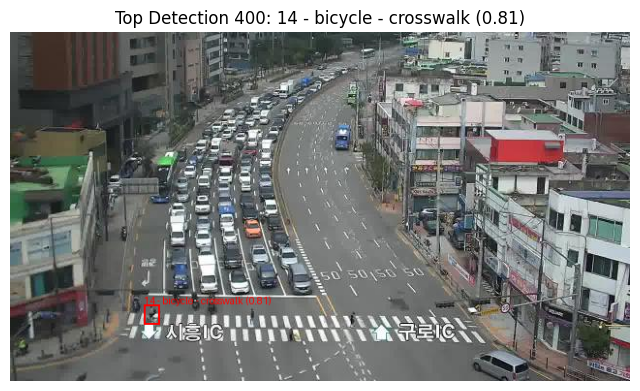

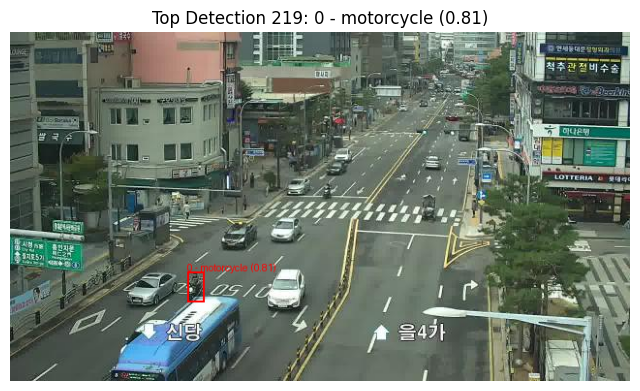

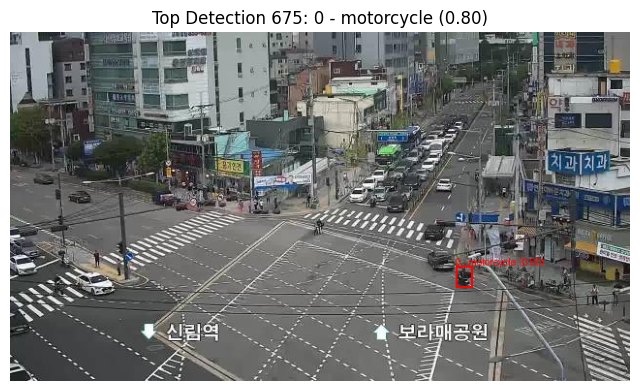

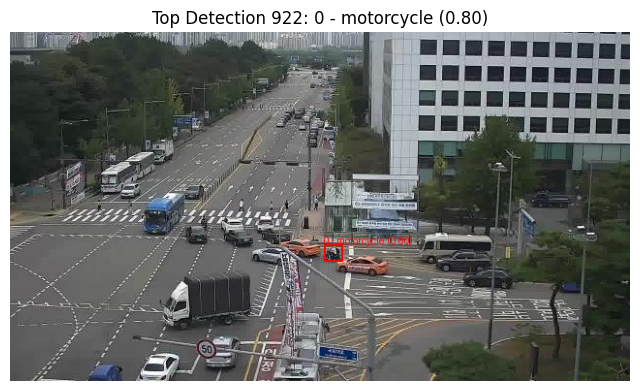

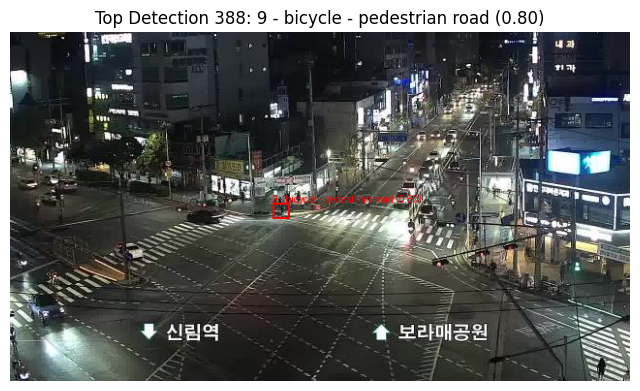

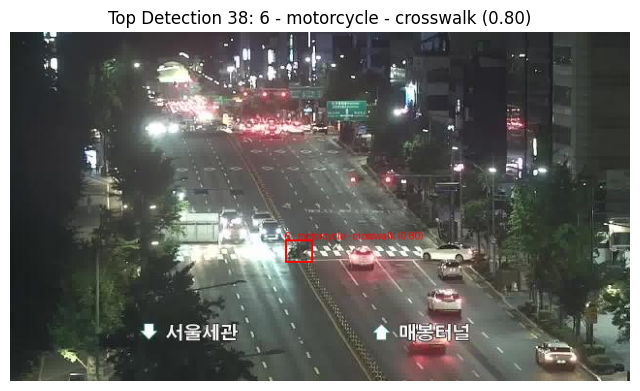

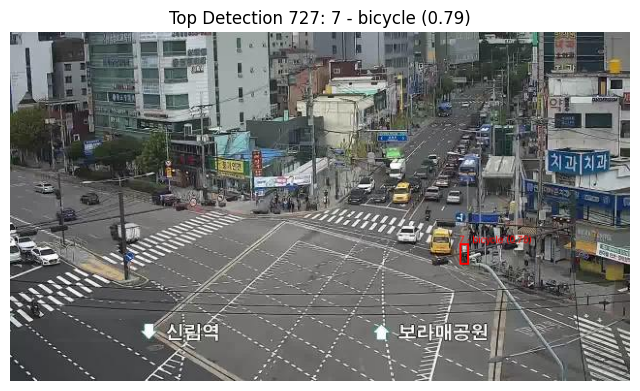

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Sort by confidence and select the top 10 entries
top_10_detections = df.sort_values(by='confidence', ascending=False).head(15)

# Iterate over the top 10 detections and plot each one
for index, row in top_10_detections.iterrows():
    # Extract the path and detection details
    image_path = row['image_path']
    detection = {
        'x': row['bbox_x'],
        'y': row['bbox_y'],
        'width': row['bbox_width'],
        'height': row['bbox_height'],
        'confidence': row['confidence'],
        'class': row['class']
    }

    # Load the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Calculate bounding box coordinates
    left = detection['x'] - (detection['width'] / 2)
    top = detection['y'] - (detection['height'] / 2)
    right = detection['x'] + (detection['width'] / 2)
    bottom = detection['y'] + (detection['height'] / 2)

    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline="red", width=2)

    # Define label text with confidence score
    label = f"{detection['class']} ({detection['confidence']:.2f})"

    # Add label text above the bounding box
    draw.text((left, top - 10), label, fill="red")

    # Display the image with Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")  # Turn off axis
    plt.title(f"Top Detection {index+1}: {detection['class']} ({detection['confidence']:.2f})")
    plt.show()


# Pretrained model 2 for traffic lght detection

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wdZfPn9rjQQWNPZHNTGY")
project = rf.workspace("mo2-workspace").project("traffic-light-detection-1zjk0")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Light-Detection-1 in yolov11:: 100%|██████████| 492/492 [00:00<00:00, 5842.51it/s]


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="wdZfPn9rjQQWNPZHNTGY")
project = rf.workspace("minhyeok-9euez").project("car-llj5h")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to car-3 in yolov11:: 100%|██████████| 13838/13838 [00:02<00:00, 4885.32it/s]


In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="wdZfPn9rjQQWNPZHNTGY"
)

result = CLIENT.infer('/content/Traffic-Light-Detection-1/test/images/00001_jpg.rf.dc8b134c59190a15d813ff3a845c0253.jpg', model_id="car-llj5h/3")

In [ ]:
result

{'inference_id': '9504bf76-5aa2-4b3f-b478-2d9f2989339d',
 'time': 0.12812047000034,
 'image': {'width': 640, 'height': 640},
 'predictions': [{'x': 621.5,
   'y': 281.0,
   'width': 37.0,
   'height': 112.0,
   'confidence': 0.9627707600593567,
   'class': 'red light',
   'class_id': 2,
   'detection_id': '258cd76c-f647-4d66-a9f3-a46f4253e710'},
  {'x': 249.0,
   'y': 340.5,
   'width': 16.0,
   'height': 57.0,
   'confidence': 0.7277169823646545,
   'class': 'red light',
   'class_id': 2,
   'detection_id': '48a326e2-19cf-4cf3-83a2-b3b61dcc7ba3'}]}

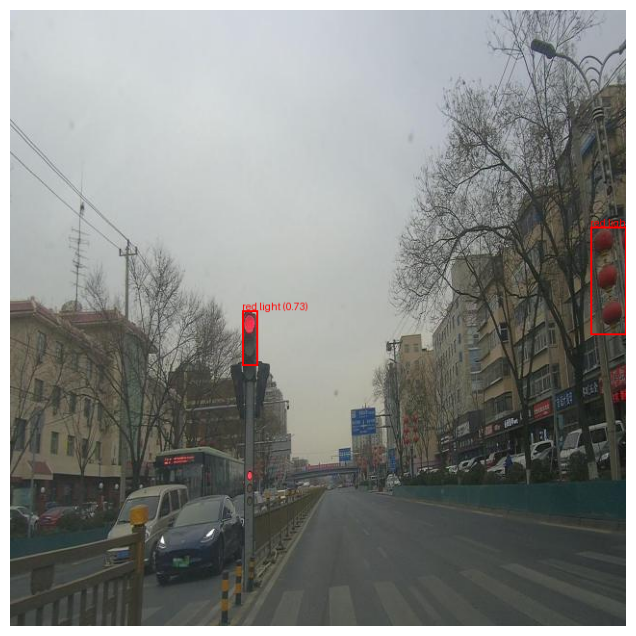

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Path to the image file
image_path = '/content/Traffic-Light-Detection-1/test/images/00001_jpg.rf.dc8b134c59190a15d813ff3a845c0253.jpg'

# Load the image
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Iterate over predictions and draw bounding boxes
for prediction in result['predictions']:
    # Calculate bounding box coordinates
    left = prediction['x'] - (prediction['width'] / 2)
    top = prediction['y'] - (prediction['height'] / 2)
    right = prediction['x'] + (prediction['width'] / 2)
    bottom = prediction['y'] + (prediction['height'] / 2)

    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline="red", width=2)

    # Define label text with confidence score
    label = f"{prediction['class']} ({prediction['confidence']:.2f})"

    # Add label text above the bounding box
    draw.text((left, top - 10), label, fill="red")

# Display the image with Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")  # Turn off axis
plt.show()


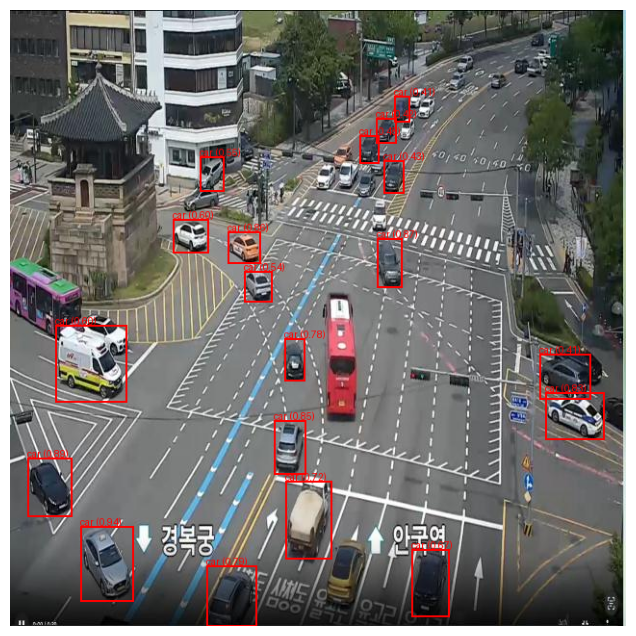

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Sample result (replace this with `result` from your actual inference)
result = CLIENT.infer('/content/car-3/test/images/-2024-06-10-3-03-08_png.rf.6ebb949ef2976f3ce3f4c8f4c85b5f29.jpg', model_id="car-llj5h/3")
# Path to the image file
image_path = '/content/car-3/test/images/-2024-06-10-3-03-08_png.rf.6ebb949ef2976f3ce3f4c8f4c85b5f29.jpg'

# Load the image
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Iterate over predictions and draw bounding boxes
for prediction in result['predictions']:
    # Calculate bounding box coordinates
    left = prediction['x'] - (prediction['width'] / 2)
    top = prediction['y'] - (prediction['height'] / 2)
    right = prediction['x'] + (prediction['width'] / 2)
    bottom = prediction['y'] + (prediction['height'] / 2)

    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline="red", width=2)

    # Define label text with confidence score
    label = f"{prediction['class']} ({prediction['confidence']:.2f})"

    # Add label text above the bounding box
    draw.text((left, top - 10), label, fill="red")

# Display the image with Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")  # Turn off axis
plt.show()


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="wdZfPn9rjQQWNPZHNTGY")
project = rf.workspace("nckh-2023").project("helmet-detection-project")
version = project.version(19)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detection-Project-19 in yolov11:: 100%|██████████| 3618/3618 [00:01<00:00, 1961.12it/s]


In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="wdZfPn9rjQQWNPZHNTGY"
)

result = CLIENT.infer('/content/Helmet-Detection-Project-19/test/images/IMG_5030-2_MOV-41_jpg.rf.0f8f84ac3c92d8f0ee0f8c70d9088318.jpg', model_id="helmet-detection-project/13")

In [ ]:
result

{'inference_id': '25937673-3a30-4aad-b06c-158186063b11',
 'time': 0.04385036500025308,
 'image': {'width': 1280, 'height': 720},
 'predictions': [{'x': 708.5,
   'y': 391.0,
   'width': 71.0,
   'height': 168.0,
   'confidence': 0.8792030811309814,
   'class': 'motorcyclist',
   'class_id': 2,
   'detection_id': '26fef654-8db1-476e-b4d2-4459112400e8'},
  {'x': 729.5,
   'y': 411.5,
   'width': 21.0,
   'height': 13.0,
   'confidence': 0.7958536744117737,
   'class': 'license_plate',
   'class_id': 1,
   'detection_id': '872952be-b8af-4ed3-bb87-59529a44124c'},
  {'x': 579.0,
   'y': 330.0,
   'width': 52.0,
   'height': 98.0,
   'confidence': 0.47972890734672546,
   'class': 'motorcyclist',
   'class_id': 2,
   'detection_id': '7e756665-bd9a-4c37-8633-aff1bd32e1f8'},
  {'x': 713.0,
   'y': 319.5,
   'width': 20.0,
   'height': 17.0,
   'confidence': 0.40153926610946655,
   'class': 'helmet',
   'class_id': 0,
   'detection_id': '1e2590b6-e532-461f-b2fd-25f3ac875421'}]}

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="wdZfPn9rjQQWNPZHNTGY")
project = rf.workspace("uninova").project("traffic-red-light-violation-izf63")
version = project.version(6)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Red-Light-Violation-6 in yolov11:: 100%|██████████| 5836/5836 [00:02<00:00, 2490.16it/s]


In [ ]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="wdZfPn9rjQQWNPZHNTGY"
)

result = CLIENT.infer('/content/Traffic-Red-Light-Violation-6/test/images/-7E37B3B7-140B-4D05-9757-A121EA2D41E0-png_jpg.rf.58d523bf988813a361d6ca48a0c81fb7.jpg', model_id="traffic-red-light-violation-izf63/5")

In [ ]:
result

{'inference_id': '265f9a56-0584-4d9e-af0b-e8b5598628e9',
 'time': 0.05015203500011012,
 'image': {'width': 640, 'height': 640},
 'predictions': [{'x': 348.0,
   'y': 374.5,
   'width': 402.0,
   'height': 431.0,
   'confidence': 0.9678117632865906,
   'class': 'car',
   'class_id': 1,
   'detection_id': 'c68835cd-740c-4b85-ad8c-d8dbb456b54f'}]}

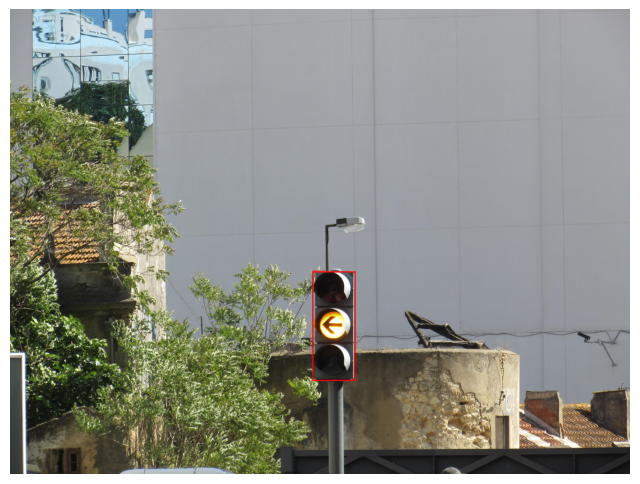

In [ ]:
# Sample result (replace this with `result` from your actual inference)
result = CLIENT.infer('/content/Traffic-Red-Light-Violation-6/test/images/IMG_0831_JPG.rf.2cfdcc6420e07c4f155c8e5f0ae33b4b.jpg', model_id="traffic-red-light-violation-izf63/5")
# Path to the image file
image_path = '/content/Traffic-Red-Light-Violation-6/test/images/IMG_0831_JPG.rf.2cfdcc6420e07c4f155c8e5f0ae33b4b.jpg'

# Load the image
image = Image.open(image_path)
draw = ImageDraw.Draw(image)

# Iterate over predictions and draw bounding boxes
for prediction in result['predictions']:
    # Calculate bounding box coordinates
    left = prediction['x'] - (prediction['width'] / 2)
    top = prediction['y'] - (prediction['height'] / 2)
    right = prediction['x'] + (prediction['width'] / 2)
    bottom = prediction['y'] + (prediction['height'] / 2)

    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline="red", width=8)

    # Define label text with confidence score
    label = f"{prediction['class']} ({prediction['confidence']:.2f})"

    # Add label text above the bounding box
    draw.text((left, top - 10), label, fill="red")

# Display the image with Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")  # Turn off axis
plt.show()
